In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data1= pd.read_excel('D:/Data Science/Assignment/18Forecasting/Airlines+Data.xlsx',parse_dates=True,index_col=0)
data1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [3]:
data = data1.copy()

In [4]:
#upsampling daily interval
upsampled= data.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935


Text(0.5, 1.0, 'Monthly Distribution of Passengers data')

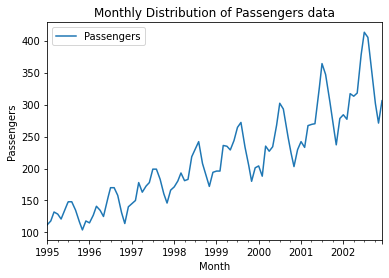

In [5]:
#interploate the missing value
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(10))
interpolated.plot()
plt.ylabel("Passengers")
plt.title("Monthly Distribution of Passengers data")

In [6]:
from numpy import sqrt

In [8]:
#sqrt transformation
airline = pd.DataFrame(data.values)
airline.columns=['passengers']
airline['passengers']=sqrt(airline['passengers'])

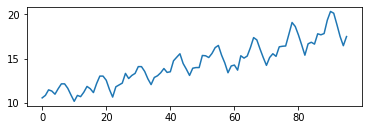

In [9]:
#line chart
plt.subplot(211)
plt.plot(airline['passengers'])

(array([ 9., 14., 10., 16., 10., 13., 10.,  8.,  3.,  3.]),
 array([10.19803903, 11.21047527, 12.22291151, 13.23534775, 14.24778399,
        15.26022023, 16.27265647, 17.28509271, 18.29752895, 19.30996519,
        20.32240143]),
 <BarContainer object of 10 artists>)

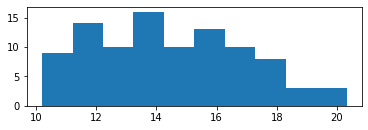

In [13]:
#histogram
plt.subplot(212)
plt.hist(airline['passengers'])


In [15]:
from numpy import log
airline['passengers']=log(airline['passengers'])

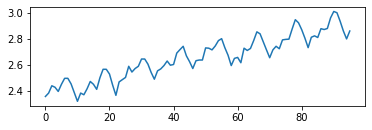

In [16]:
#line chart
plt.subplot(211)
plt.plot(airline['passengers'])

(array([ 7.,  9.,  8., 13., 14., 15., 11., 10.,  5.,  4.]),
 array([2.32219545, 2.39114828, 2.46010112, 2.52905395, 2.59800679,
        2.66695962, 2.73591246, 2.80486529, 2.87381813, 2.94277096,
        3.0117238 ]),
 <BarContainer object of 10 artists>)

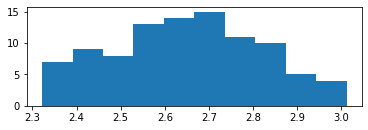

In [17]:
#histogram
plt.subplot(212)
plt.hist(airline['passengers'])

In [19]:
#Simple Moving Avarage(SMA)
airline['6-months-SMA']=airline['passengers'].rolling(window=6).mean()
airline['12-month-SMA']=airline['passengers'].rolling(window=12).mean()

In [25]:
airline.head(20)

,passengers,6-months-SMA,12-month-SMA
0,2.359249,NaN,NaN
1,2.385342,NaN,NaN
2,2.441401,NaN,NaN
3,2.429906,NaN,NaN
4,2.397895,NaN,NaN
5,2.452637,2.411072,NaN
6,2.498606,2.434298,NaN
7,2.498606,2.453175,NaN
8,2.456327,2.455663,NaN
9,2.389562,2.448939,NaN


<AxesSubplot:>

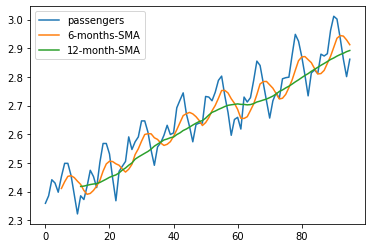

In [26]:
airline.plot()

<AxesSubplot:>

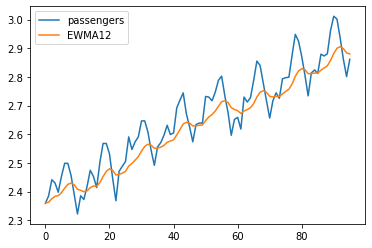

In [28]:
#Exponantional weighted moving avarage(EWMA)
airline['EWMA12']=airline['passengers'].ewm(span=12,adjust=False).mean()
airline[['passengers','EWMA12']].plot()

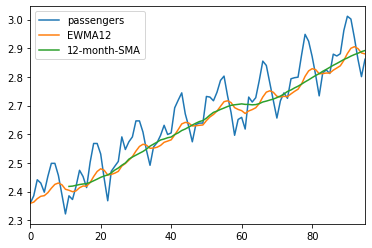

In [96]:
#comparision between SMA And EWMA
airline[['passengers','EWMA12','12-month-SMA']].plot().autoscale(axis='x',tight=True)

In [34]:
#train test split
train_data=data.iloc[0:83]
test_data=data.iloc[83:]
train_data.shape,test_data.shape

((83, 1), (13, 1))

<AxesSubplot:xlabel='Month'>

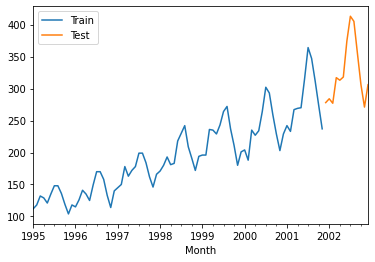

In [45]:
train_data['Passengers'].plot(legend=True,label='Train')
test_data['Passengers'].plot(legend=True,label='Test')

In [42]:
#fit model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
fitted_model=model.fit()

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [43]:
#model evaluation
test_prediction=fitted_model.forecast(13)

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [46]:
test_prediction

2001-12-01    271.123377
2002-01-01    278.218314
2002-02-01    276.788586
2002-03-01    322.239395
2002-04-01    313.625622
2002-05-01    313.610872
2002-06-01    353.214134
2002-07-01    395.944672
2002-08-01    392.579914
2002-09-01    350.207002
2002-10-01    309.391865
2002-11-01    270.900873
2002-12-01    308.377705
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

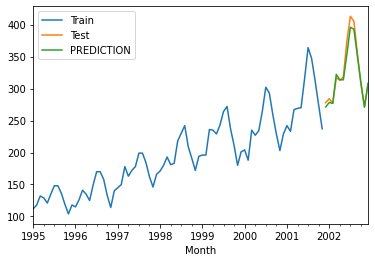

In [47]:
train_data['Passengers'].plot(legend=True,label='Train')
test_data['Passengers'].plot(legend=True,label='Test')
test_prediction.plot(legend=True,label='PREDICTION')

<AxesSubplot:xlabel='Month'>

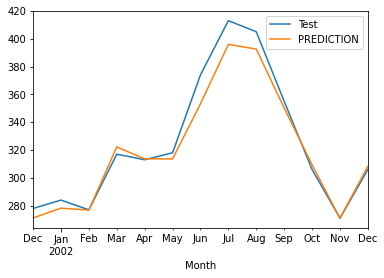

In [48]:
test_data['Passengers'].plot(legend=True,label='Test')
test_prediction.plot(legend=True,label='PREDICTION')

<AxesSubplot:xlabel='Month'>

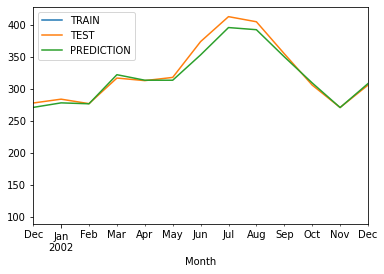

In [49]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST')
test_prediction.plot(legend=True,label='PREDICTION',xlim=['2001-12-01','2002-12-01'])

Evaluate the matrics

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
#MSE 
mean_squared_error(test_data,test_prediction)

80.40027088439503

In [52]:
#RMSE
np.sqrt(mean_squared_error(test_data,test_prediction))

8.966619813753399

In [53]:
test_data.describe()

,Passengers
count,13.000000
mean,324.384615
std,47.896657
min,271.000000
25%,284.000000
50%,313.000000
75%,355.000000
max,413.000000


In [54]:
#forecasting
final_model=ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
forecast_prediction= final_model.forecast(36)

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

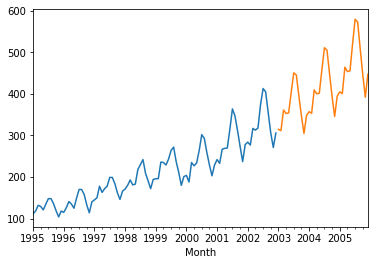

In [55]:
data['Passengers'].plot()
forecast_prediction.plot()

#### Simple Exponentional Smoothing

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span=12
alpha=2/(span+1)

data['EWMA12']=data['Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [58]:
model_ses12=SimpleExpSmoothing(data['Passengers'])
fittted_model=model_ses12.fit(smoothing_level=alpha,optimized=False)
data['SES12']= fitted_model.fittedvalues.shift(-1)
data.head()

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Passengers,EWMA12,SES12
Month,,,
1995-01-01,112,112.000000,111.930995
1995-02-01,118,112.923077,134.951450
1995-03-01,132,115.857988,129.457432
1995-04-01,129,117.879836,129.150926
1995-05-01,121,118.359861,139.430915


#### Double Expo. smoothing

In [60]:
mod_add12 = ExponentialSmoothing(data['Passengers'], trend='add')
fitted_model= mod_add12.fit()
data['DESadd12'] = fitted_model.fittedvalues.shift(-1)
data

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Passengers,EWMA12,SES12,DESadd12
Month,,,,
1995-01-01,112,112.000000,111.930995,113.906690
1995-02-01,118,112.923077,134.951450,119.892348
1995-03-01,132,115.857988,129.457432,133.875482
1995-04-01,129,117.879836,129.150926,130.912884
1995-05-01,121,118.359861,139.430915,122.923301
...,...,...,...,...
2002-08-01,405,335.501047,NaN,406.932611
2002-09-01,355,338.500886,NaN,357.022149
2002-10-01,306,333.500749,NaN,308.016044


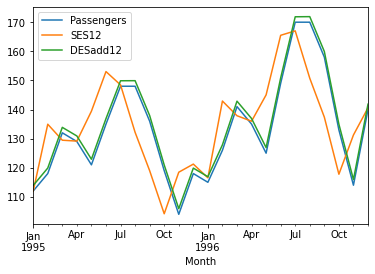

In [61]:
data[['Passengers','SES12','DESadd12']].iloc[:24].plot().autoscale(axis='x',tight=True)

In [62]:
data['DESmul12'] = ExponentialSmoothing(data['Passengers'], trend='mul').fit().fittedvalues.shift(-1)
data.head()

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1995-01-01,112,112.000000,111.930995,113.906690,110.800278
1995-02-01,118,112.923077,134.951450,119.892348,117.037015
1995-03-01,132,115.857988,129.457432,133.875482,131.616058
1995-04-01,129,117.879836,129.150926,130.912884,128.600136
1995-05-01,121,118.359861,139.430915,122.923301,120.340645


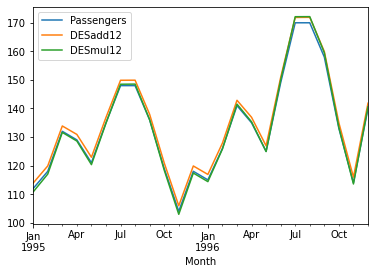

In [63]:
data[['Passengers','DESadd12','DESmul12']].iloc[:24].plot().autoscale(axis='x',tight=True);

#### Triple Expo. smoothing

In [64]:
data['TESadd12'] = ExponentialSmoothing(data['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data.head()

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1995-01-01,112,112.000000,111.930995,113.906690,110.800278,112.001470
1995-02-01,118,112.923077,134.951450,119.892348,117.037015,119.928571
1995-03-01,132,115.857988,129.457432,133.875482,131.616058,134.242517
1995-04-01,129,117.879836,129.150926,130.912884,128.600136,130.732168
1995-05-01,121,118.359861,139.430915,122.923301,120.340645,123.858532


In [65]:
data['TESmul12'] = ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data.head()

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1995-01-01,112,112.000000,111.930995,113.906690,110.800278,112.001470,113.645041
1995-02-01,118,112.923077,134.951450,119.892348,117.037015,119.928571,111.327132
1995-03-01,132,115.857988,129.457432,133.875482,131.616058,134.242517,134.355855
1995-04-01,129,117.879836,129.150926,130.912884,128.600136,130.732168,129.668611
1995-05-01,121,118.359861,139.430915,122.923301,120.340645,123.858532,129.739619


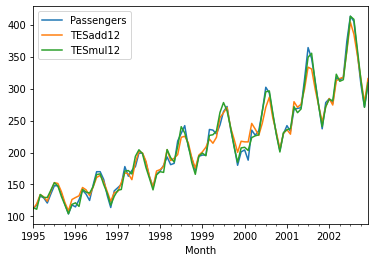

In [66]:
data[['Passengers','TESadd12','TESmul12']].plot().autoscale(axis='x',tight=True)

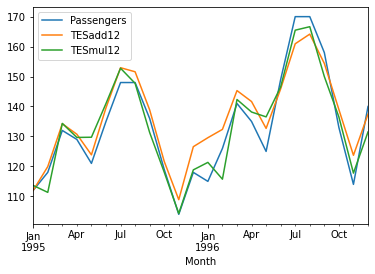

In [67]:
data[['Passengers','TESadd12','TESmul12']].iloc[:24].plot().autoscale(axis='x',tight=True)

In [68]:
from statsmodels.tsa.ar_model import AR,ARResults

In [69]:
#AR model
ar_models= AR(train_data['Passengers'])
ARfit=ar_models.fit(method='mle',ic='aic')

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWar

In [70]:
ARfit.params

const            2.845652
L1.Passengers    1.179806
L2.Passengers   -0.434338
L3.Passengers    0.174033
L4.Passengers   -0.289232
L5.Passengers    0.304466
L6.Passengers   -0.078443
L7.Passengers    0.066192
L8.Passengers   -0.361895
L9.Passengers    0.425184
dtype: float64

In [71]:
start=len(train_data)
end=len(data)-1

In [72]:
#predict data
prediction9=ARfit.predict(start=start,end=end).rename('AR(9) Prediction')

<AxesSubplot:xlabel='Month'>

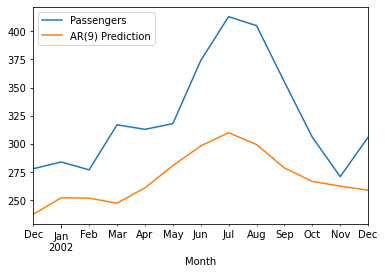

In [74]:
#plot test and predict data
test_data['Passengers'].plot(legend=True)
prediction9.plot(legend=True)  

In [75]:
from statsmodels.tsa.arima_model import ARIMA

In [76]:
#ARIMA
model = ARIMA(data.Passengers, order=(1,1,1))
model_fit = model.fit(disp=0)

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferr

In [77]:
#summary of model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -427.813
Method:                       css-mle   S.D. of innovations             21.536
Date:                Thu, 08 Jul 2021   AIC                            863.627
Time:                        21:48:01   BIC                            873.842
Sample:                    02-01-1995   HQIC                           867.755
                         - 12-01-2002                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2914      0.266      8.601      0.000       1.769       2.814
ar.L1.D.Passengers     0.7248      0.073      9.898      0.000       0.581       0.868
ma.L1.D.Passengers    -1.0000      0.028    -36.363      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3797           +0.0000j            1.3797            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [78]:
#RMSE for ARIMA
residual = pd.DataFrame(model_fit.resid)
rmse = np.mean(((residual)**2)**0.5)
rmse

0    16.950775
dtype: float64

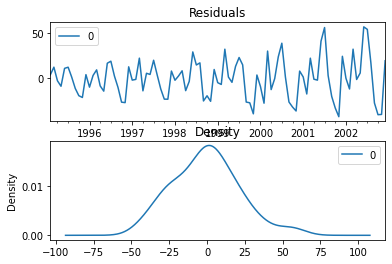

In [105]:
#residuals plot and density of residuals
fig, ax = plt.subplots(2,1)
residual.plot(title="Residuals", ax=ax[0])
residual.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


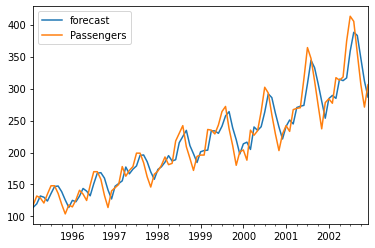

In [80]:
#prediction
model_fit.plot_predict()
plt.show()

In [81]:
#train test split 
train = data.Passengers[0:83]
test = data.Passengers[83:]

In [82]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferr

In [83]:
#forecast
forecast, se, conf = fitted.forecast(13, alpha=0.05)

In [84]:
fc_series = pd.Series(forecast, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

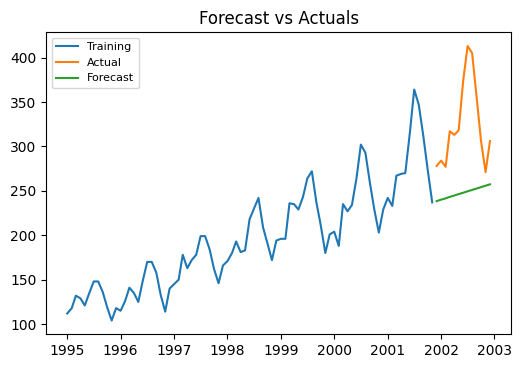

In [87]:
#plot forecast VS actual
plt.figure(dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [88]:
from statsmodels.tsa.stattools import acf

In [90]:
#rmse and acf value
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  
    acf1 = acf(forecast-test)                     
    return({ 'rmse':rmse, 'acf1':acf1})

In [91]:
forecast_accuracy(forecast, test.values)

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'rmse': 88.64114397174737,
 'acf1': array([ 1.        ,  0.69551131,  0.16926306, -0.26823018, -0.43325396,
        -0.41369395, -0.33774992, -0.23381515, -0.08797967,  0.09368167,
         0.15541519,  0.12149122,  0.03936036])}

In [92]:
import statsmodels.api as sm

In [93]:
#SARIMA Model
mod = sm.tsa.SARIMAX(data["Passengers"], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -307.047
Date:                              Thu, 08 Jul 2021   AIC                            620.094
Time:                                      21:52:34   BIC                            627.350
Sample:                                  01-01-1995   HQIC                           623.009
                                       - 12-01-2002                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1455      0.446     -0.327      0.744      -1.019       0.728
ma.S.L12      -0.12

In [94]:
#RMSE Of SARIMA MODEL
sarima_rmse = np.mean(((results.resid)**2)**0.5)
sarima_rmse

9.536128129882819

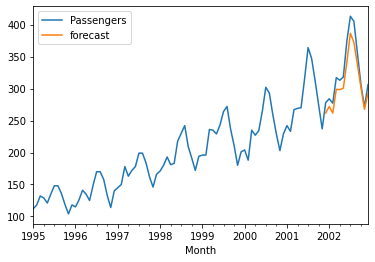

In [95]:
data['forecast'] = results.predict(start = 83, end=96 , dynamic= True)  
data[['Passengers', 'forecast']].plot()
plt.show()

After calculating rmse for different models we can conclude that SARIMA model performing on whole. Passengers value gives us lesser rmse is good model compare to model with ARIMA model with -1 dispersion and applying on training data.
and rmse from ARIMA model with 0 dispersion on whole Passengers data gives higher rmse compare to SARIMA.
#### Therefor, SARIMA model is good compare to others.